# Sentiment Analysis - Logistic Regression

In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# 2. Load Dataset
df = pd.read_csv("reviews.csv")  # Make sure reviews.csv is in your working directory
df.head()

,Review Text,Sentiment
0,I love this product! It's amazing.,positive
1,"Absolutely terrible, would not recommend.",negative
2,Great value for money.,positive
3,Worst purchase I ever made.,negative
4,"Decent quality, could be better.",negative


In [5]:
# 3. Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['Cleaned_Review'] = df['Review Text'].apply(preprocess_text)
df[['Review Text', 'Cleaned_Review', 'Sentiment']].head()

,Review Text,Cleaned_Review,Sentiment
0,I love this product! It's amazing.,love product amazing,positive
1,"Absolutely terrible, would not recommend.",absolutely terrible would recommend,negative
2,Great value for money.,great value money,positive
3,Worst purchase I ever made.,worst purchase ever made,negative
4,"Decent quality, could be better.",decent quality could better,negative


In [6]:
# 4. Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Cleaned_Review'])

# Encode labels: positive -> 1, negative -> 0
y = df['Sentiment'].map({'positive': 1, 'negative': 0})

In [7]:
# 5. Train-Test Split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# 6. Model Training
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
# 7. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1 Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



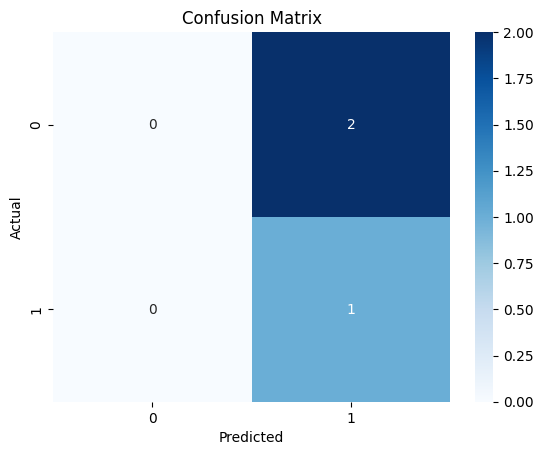

In [11]:
# 8. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# 9. Cross-Validation (5-Fold)
cv_scores = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.5 0.5 0.5 0.5 0.5]
Mean CV Accuracy: 0.5


In [13]:
# 10. Insights: Sample Predictions
results = pd.DataFrame({
    "Review": df['Review Text'].iloc[y_test.index],
    "Actual": y_test.values,
    "Predicted": y_pred
})
results['Correct'] = results['Actual'] == results['Predicted']
results

,Review,Actual,Predicted,Correct
8,Poor packaging and slow delivery.,0,1,False
1,"Absolutely terrible, would not recommend.",0,1,False
5,Fantastic! Will buy again.,1,1,True
